<a href="https://colab.research.google.com/github/sohil344/OSMNX_lib/blob/main/Welcome_To_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
pip install osmnx

In [39]:
import networkx as nx
import osmnx as ox

In [40]:
%matplotlib inline
ox.__version__

'1.5.0'

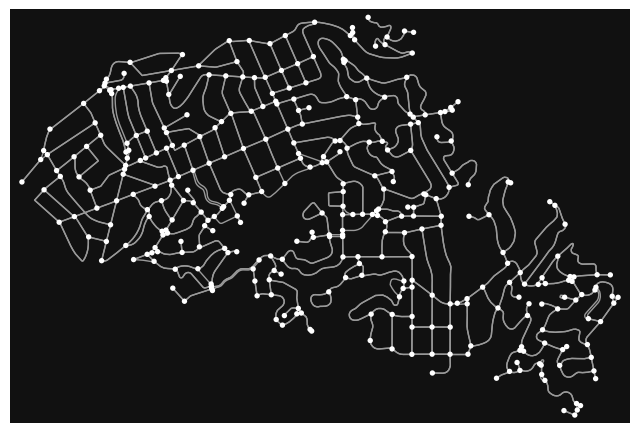

In [5]:
# download/model a street network for some city then visualize it
G = ox.graph_from_place("Piedmont, California, USA", network_type="drive")
fig, ax = ox.plot_graph(G)

In [7]:
# convert your MultiDiGraph to an undirected MultiGraph
M = ox.utils_graph.get_undirected(G)

# convert your MultiDiGraph to a DiGraph without parallel edges
D = ox.utils_graph.get_digraph(G)

In [9]:
# you can convert your graph to node and edge GeoPandas GeoDataFrames
gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)
gdf_nodes.head()

,y,x,street_count,highway,geometry
osmid,,,,,
53017091,37.826250,-122.247604,3,NaN,POINT (-122.24760 37.82625)
53018397,37.824224,-122.247194,3,NaN,POINT (-122.24719 37.82422)
53018399,37.824900,-122.246113,3,NaN,POINT (-122.24611 37.82490)
53018402,37.825406,-122.245338,3,NaN,POINT (-122.24534 37.82541)
53018404,37.825948,-122.244467,3,NaN,POINT (-122.24447 37.82595)


In [10]:
gdf_edges.head()

osmid          name      highway  oneway reversed  \
u        v        key                                                          
53017091 53064327 0      6345781   Rose Avenue  residential   False    False   
         53075599 0      6345781   Rose Avenue  residential   False     True   
53018397 53018399 0      6327298   Lake Avenue  residential   False    False   
         53018411 0    196739937  Linda Avenue     tertiary   False    False   
         53097980 0    196739937  Linda Avenue     tertiary   False     True   

                        length  \
u        v        key            
53017091 53064327 0    230.124   
         53075599 0    122.235   
53018397 53018399 0    121.096   
         53018411 0     37.803   
         53097980 0     99.976   

                                                                geometry  \
u        v        key                                                      
53017091 53064327 0    LINESTRING (-122.24760 37.82625, -122.24750 37...   
         53075599 0    LINESTRING (-122.24760 37.82625, -122.24771 37...   
53018397 53018399 0    LINESTRING (-122.24719 37.82422, -122.24712 37...   
         53018411 0    LINESTRING (-122.24719 37.82422, -122.24713 37...   
         53097980 0    LINESTRING (-122.24719 37.82422, -122.24773 37...   

                      lanes maxspeed bridge junction  
u        v        key                                 
53017091 53064327 0     NaN      NaN    NaN      NaN  
         53075599 0     NaN      NaN    NaN      NaN  
53018397 53018399 0     NaN      NaN    NaN      NaN  
         53018411 0     NaN      NaN    NaN      NaN  
         53097980 0     NaN      NaN    NaN      NaN

In [11]:
# convert node/edge GeoPandas GeoDataFrames to a NetworkX MultiDiGraph
G2 = ox.graph_from_gdfs(gdf_nodes, gdf_edges, graph_attrs=G.graph)

In [14]:
G2

In [18]:
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m

4198712.752501382

In [16]:
nodes_proj.

,y,x,street_count,lon,lat,highway,geometry
osmid,,,,,,,
53017091,4.186804e+06,566214.413182,3,-122.247604,37.826250,NaN,POINT (566214.413 4186804.025)
53064327,4.186945e+06,566396.483295,3,-122.245522,37.827503,NaN,POINT (566396.483 4186944.568)
53075599,4.186687e+06,566181.072795,4,-122.247993,37.825200,NaN,POINT (566181.073 4186687.228)
53018397,4.186580e+06,566252.280381,3,-122.247194,37.824224,NaN,POINT (566252.280 4186579.550)
53018399,4.186655e+06,566346.803856,3,-122.246113,37.824900,NaN,POINT (566346.804 4186655.265)
...,...,...,...,...,...,...,...
256338808,4.185465e+06,568917.767469,3,-122.217016,37.813981,NaN,POINT (568917.767 4185464.862)
256338809,4.185497e+06,568900.261253,3,-122.217211,37.814273,NaN,POINT (568900.261 4185497.160)
256338812,4.185547e+06,568897.006540,3,-122.217243,37.814726,NaN,POINT (568897.007 4185547.331)


In [19]:
ox.basic_stats(G_proj, area=graph_area_m, clean_int_tol=15)

{'n': 353,
 'm': 948,
 'k_avg': 5.371104815864022,
 'edge_length_total': 111987.33500000024,
 'edge_length_avg': 118.13010021097071,
 'streets_per_node_avg': 2.951841359773371,
 'streets_per_node_counts': {0: 0, 1: 34, 2: 0, 3: 270, 4: 47, 5: 2},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.09631728045325778,
  2: 0.0,
  3: 0.7648725212464589,
  4: 0.13314447592067988,
  5: 0.0056657223796034},
 'intersection_count': 319,
 'street_length_total': 58057.43200000003,
 'street_segment_count': 497,
 'street_length_avg': 116.81575855130791,
 'circuity_avg': 1.110539630911476,
 'self_loop_proportion': 0.006036217303822937,
 'clean_intersection_count': 267,
 'node_density_km': 84.07338648963314,
 'intersection_density_km': 75.975666544456,
 'edge_density_km': 26671.825771668668,
 'street_density_km': 13827.43603153427,
 'clean_intersection_density_km': 63.59091839300863}

In [20]:
ox.save_graph_geopackage(G, filepath="./data/mynetwork.gpkg")
ox.save_graphml(G, filepath="./data/mynetwork.graphml")

In [21]:
# convert graph to line graph so edges become nodes and vice versa
edge_centrality = nx.closeness_centrality(nx.line_graph(G))
nx.set_edge_attributes(G, edge_centrality, "edge_centrality")

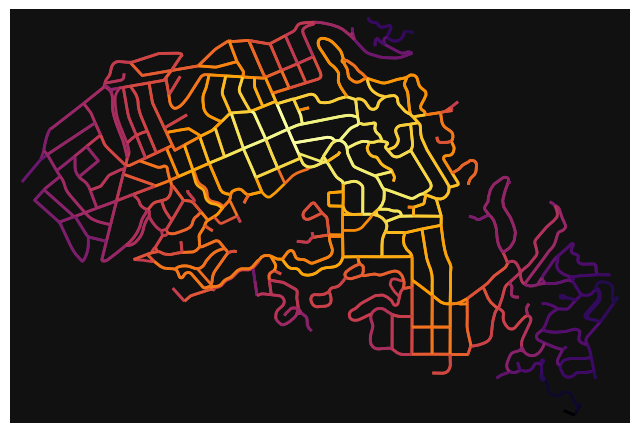

In [23]:
# color edges in original graph with closeness centralities from line graph
ec = ox.plot.get_edge_colors_by_attr(G, "edge_centrality", cmap="inferno")
fig, ax = ox.plot_graph(G, edge_color=ec, edge_linewidth=2, node_size=0)

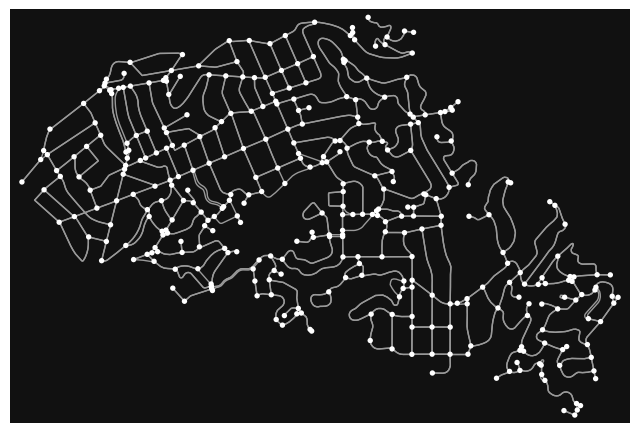

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [17]:
#how to download OpenStreetMap data using the Osmnx library in Python:
# Define the location (can be a place name, address, bounding box, or coordinates)
location_name = "Piedmont, California, USA"

G=ox.graph_from_place(location_name,network_type='drive')

ox.plot_graph(G)

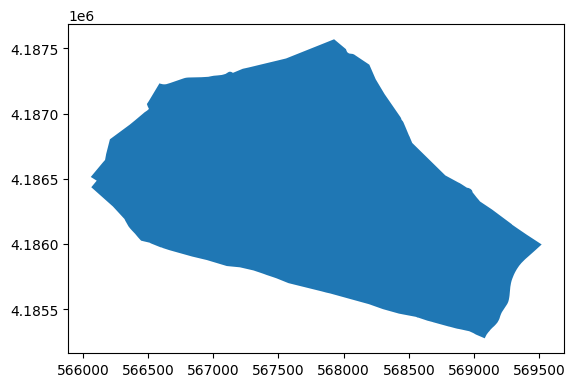

In [18]:
location_name = "Piedmont, California, USA"
city=ox.geocode_to_gdf(location_name)
ax=ox.project_gdf(city).plot()


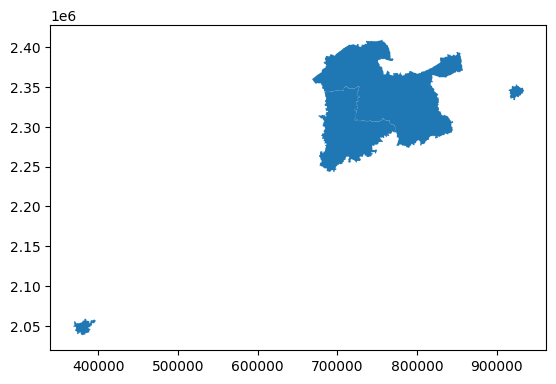

In [19]:
places=ox.geocode_to_gdf(['Akola, Maharashtra,India','Amravati, Maharashtra,India','Nagpur, Maharashtra,India','Pune, Maharashtra,India'])
ax=ox.project_gdf(places).plot()

In [24]:
#Street Network Using Bounding Box

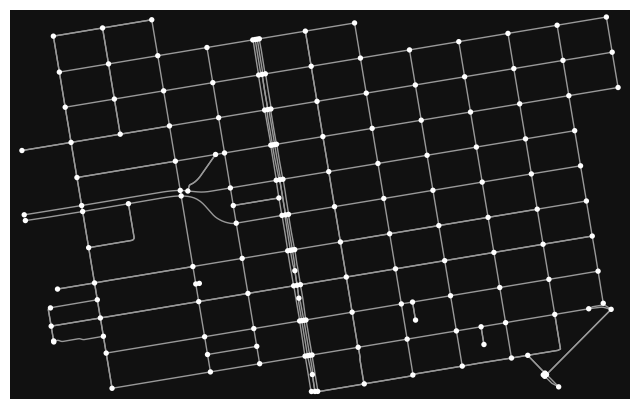

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [24]:
G = ox.graph_from_bbox(37.79, 37.78, -122.41, -122.43, network_type='drive')
G_projected = ox.project_graph(G)
ox.plot_graph(G_projected)

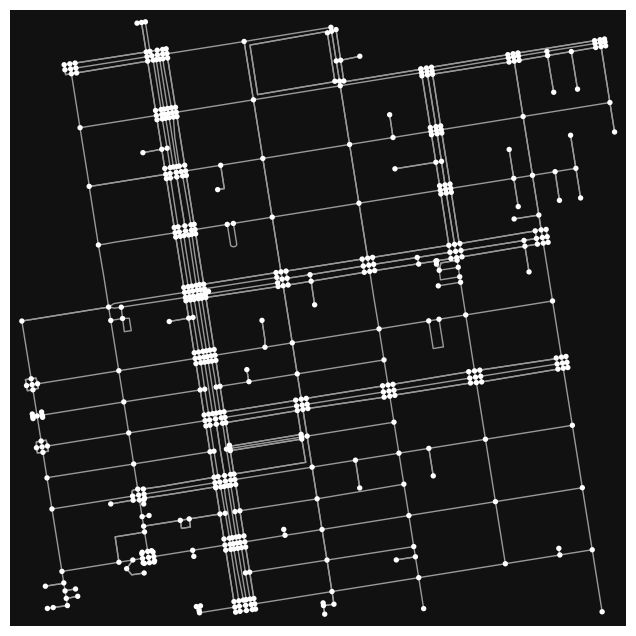

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [32]:
#Street Netwoek from Lat-Long point
G=ox.graph_from_point((37.79,-122.42),dist=500,network_type='all')
ox.plot_graph(G)

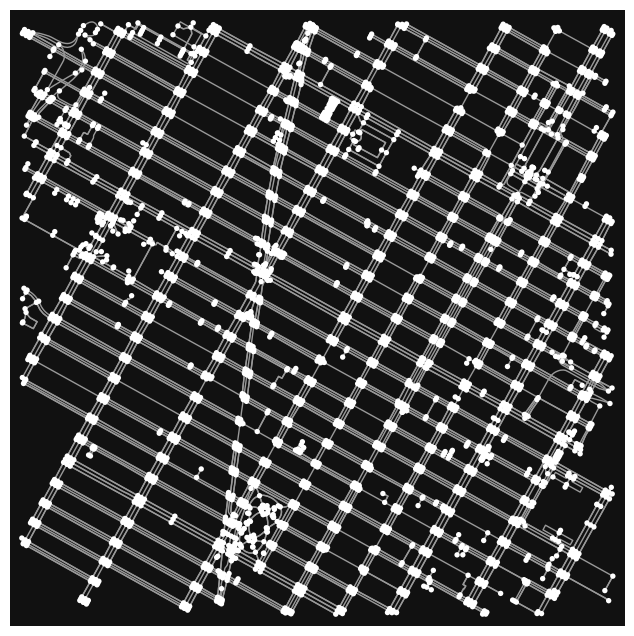

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [33]:
# street network from address

G=ox.graph_from_address('350 5th Avenue, New York')
ox.plot_graph(G)

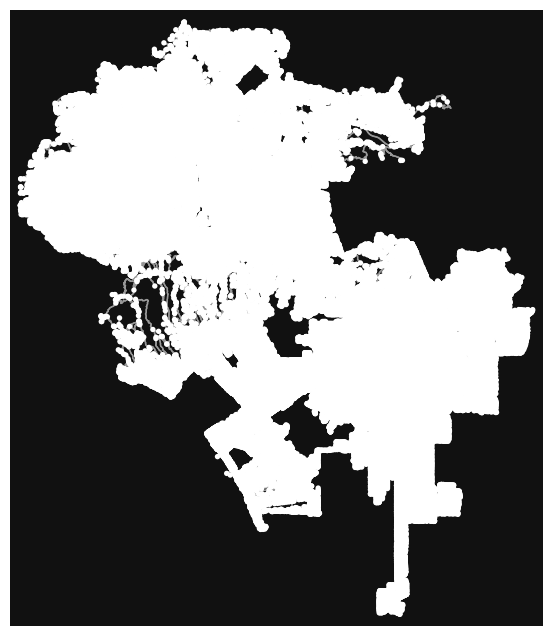

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [34]:
#street network from place name

G=ox.graph_from_place('Los Angeles, California')
ox.plot_graph(G)

In [41]:
G=ox.graph_from_place('Santa Monica, California',network_type='drive')
basic_stats=ox.basic_stats(G)
for  i in basic_stats:
  print(i," : ",basic_stats[i])

n  :  1235
m  :  3562
k_avg  :  5.768421052631579
edge_length_total  :  490597.18799999956
edge_length_avg  :  137.73082201010655
streets_per_node_avg  :  3.337651821862348
streets_per_node_counts  :  {0: 0, 1: 81, 2: 20, 3: 551, 4: 569, 5: 12, 6: 2}
streets_per_node_proportions  :  {0: 0.0, 1: 0.06558704453441296, 2: 0.016194331983805668, 3: 0.4461538461538462, 4: 0.46072874493927124, 5: 0.009716599190283401, 6: 0.0016194331983805667}
intersection_count  :  1154
street_length_total  :  277825.33899999975
street_segment_count  :  2046
street_length_avg  :  135.78951075268805
circuity_avg  :  1.0083241005050643
self_loop_proportion  :  0.0004887585532746823


In [46]:
G=ox.graph_from_place('Santa Monica, California',network_type='drive')
extend_stats=ox.extended_stats(G)
for  i in extend_stats:
  print(i," : ",extend_stats[i])

AttributeError: ignored

In [47]:
import osmnx as ox

# Define the location (can be a place name, address, bounding box, or coordinates)
location_name = "New York City, New York, USA"

# Download the street network data for the specified location
G = ox.graph_from_place(location_name, network_type="drive")

# Calculate extended statistics for the street network
extended_stats = ox.extended_stats(G)

# Print the extended statistics
print(extended_stats)


AttributeError: ignored

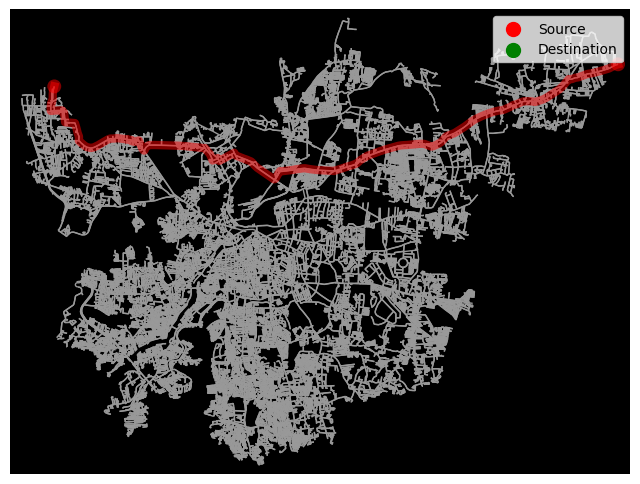

In [64]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt

location_name='Pune,Maharashtra,India'

G=ox.graph_from_place(location_name,network_type='drive')

source=(18.650911, 73.8099529)
dest=(18.75,74.8)

source_node=ox.distance.nearest_nodes(G,source[1],source[0])
dest_node=ox.distance.nearest_nodes(G,dest[1],dest[0])

#Calc shortest path from source to destination

shortest_path=nx.shortest_path(G,source=source_node,target=dest_node,weight='length')

fig,ax=ox.plot_graph_route(G,shortest_path,route_linewidth=6,node_size=0,
                           bgcolor='k',show=False,close=False)

#Add marker to source and Destination
ax.scatter(source[1], source[0], c='red', s=100, marker='o', label='Source')
ax.scatter(dest[1], dest[0], c='green', s=100, marker='o', label='Destination')

ax.legend()

plt.show()

In [52]:
location_name='Pune,Maharashtra,India'

G=ox.graph_from_place(location_name,network_type='drive')

source=(18.650911, 73.8099529)
dest=(18.75,74.8)

In [60]:
ox.distance.nearest_nodes(G,source[1],source[0])

9568065559

In [65]:
place='Piedmont, CA, USA'

G=ox.graph_from_place(place,network_type='drive')


1. Fast nearest node/edge search with OSMnx

In [66]:
#convert graph to geodataframe

gdf_edges=ox.graph_to_gdfs(G,nodes=False)

In [80]:
gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)


In [81]:
gdf_nodes.head(1)

,y,x,street_count,highway,geometry
osmid,,,,,
53017091,37.82625,-122.247604,3,NaN,POINT (-122.24760 37.82625)


In [82]:
gdf_edges.head(1)

,,,osmid,name,highway,oneway,reversed,length,geometry,lanes,maxspeed,bridge,junction
u,v,key,,,,,,,,,,,
53017091,53064327,0,6345781,Rose Avenue,residential,False,False,230.124,"LINESTRING (-122.24760 37.82625, -122.24750 37...",NaN,NaN,NaN,NaN


In [85]:
#List of Lats and Longs

langs=gdf_edges.head().centroid.map(lambda x:x.coords[0][0])
lats=gdf_edges.head().centroid.map(lambda x:x.coords[0][1])

<ipython-input-85-120ea1f0000a>:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  langs=gdf_edges.head().centroid.map(lambda x:x.coords[0][0])
<ipython-input-85-120ea1f0000a>:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  lats=gdf_edges.head().centroid.map(lambda x:x.coords[0][1])


In [86]:
langs

u         v         key
53017091  53064327  0     -122.246559
          53075599  0     -122.247830
53018397  53018399  0     -122.246651
          53018411  0     -122.247080
          53097980  0     -122.247480
dtype: float64

In [87]:
#Lat and Long at spatial centre of the graph

lng,lat=gdf_edges.unary_union.centroid.coords[0]
centre_point=lat,lng
print(centre_point)

(37.82284623203896, -122.23117171765423)


In [90]:
#Find the nearest node to some point

centre_node=ox.distance.nearest_nodes(G,centre_point[0],centre_point[1])
centre_node

53035698

In [95]:
#Find the nearest Edge to some point

nearest_edge=ox.distance.nearest_edges(G,centre_point[0],centre_point[1])
nearest_edge

(53035698, 703006798, 0)

**Basic Routing by Distance**

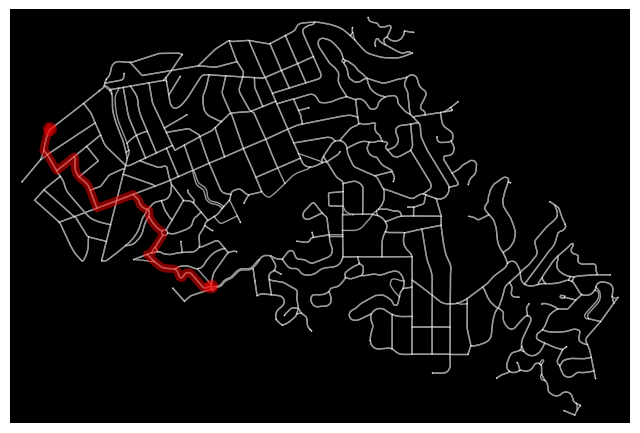

In [98]:
#Pick two nodes. Then find the shortest path between origin and destination, using weight='length' to find the shortest path
#by minimizing distance traveled (otherwise it treats each edge as weight=1).


# find the shortest path (by distance) between these nodes then plot it


orig=list(G)[0]
dest=list(G)[-1]
route=nx.shortest_path(G,orig,dest,weight='length')

fig,ax=ox.plot_graph_route(G,route,route_linewidth=6,node_size=1,bgcolor='k')

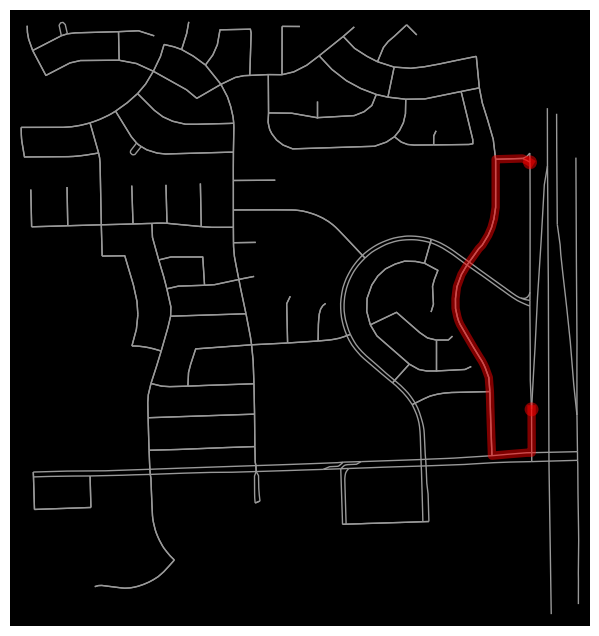

In [103]:
G2=ox.graph_from_address('N. Sicily Pl., Chandler, Arizona',dist=800,network_type='drive')

origin=(33.307792, -111.894940)
dest=(33.312994, -111.894998)

origin_node=ox.distance.nearest_nodes(G2,origin[1],origin[0])
dest_node=ox.distance.nearest_nodes(G2,dest[1],dest[0])

route=nx.shortest_path(G2,origin_node,dest_node,weight='length')
fig,ax=ox.plot_graph_route(G2,route,route_linewidth=6,node_size=0,bgcolor='k')

In [104]:
# impute speed on all edges missing data taking mean of max speed km/hr
G=ox.add_edge_speeds(G)

In [106]:
#impute time on all edges missing data taking mean of max time in sec
G=ox.add_edge_travel_times(G)

In [107]:
#See mean speed/time values by road_types

edges=ox.graph_to_gdfs(G,nodes=False)
edges.highway=edges.highway.astype(str)
edges.groupby('highway')[['length','speed_kph','travel_time']].mean().round(1)

,length,speed_kph,travel_time
highway,,,
residential,123.1,24.6,18.0
secondary,112.0,44.3,9.2
tertiary,101.0,40.2,9.0
tertiary_link,55.6,36.4,5.5
unclassified,28.7,36.4,2.8


In [108]:
orig=list(G)[0]
dest=list(G)[-1]

In [109]:
route1=nx.shortest_path(G,orig,dest,weight='length')
route2=nx.shortest_path(G,orig,dest,weight='travel_time')

In [110]:
route1_length=int(sum(ox.utils_graph.get_route_edge_attributes(G,route1,'length')))
route2_length=int(sum(ox.utils_graph.get_route_edge_attributes(G,route2,'length')))

<ipython-input-110-5ff417f2123c>:1: UserWarning: The `get_route_edge_attributes` function has been deprecated and will be removed in a future release. Use the `route_to_gdf` function instead.
  route1_length=int(sum(ox.utils_graph.get_route_edge_attributes(G,route1,'length')))
<ipython-input-110-5ff417f2123c>:2: UserWarning: The `get_route_edge_attributes` function has been deprecated and will be removed in a future release. Use the `route_to_gdf` function instead.
  route2_length=int(sum(ox.utils_graph.get_route_edge_attributes(G,route2,'length')))


In [111]:
route1_time=int(sum(ox.utils_graph.get_route_edge_attributes(G,route1,'travel_time')))
route2_time=int(sum(ox.utils_graph.get_route_edge_attributes(G,route2,'travel_time')))

<ipython-input-111-dbadb01a3246>:1: UserWarning: The `get_route_edge_attributes` function has been deprecated and will be removed in a future release. Use the `route_to_gdf` function instead.
  route1_time=int(sum(ox.utils_graph.get_route_edge_attributes(G,route1,'travel_time')))
<ipython-input-111-dbadb01a3246>:2: UserWarning: The `get_route_edge_attributes` function has been deprecated and will be removed in a future release. Use the `route_to_gdf` function instead.
  route2_time=int(sum(ox.utils_graph.get_route_edge_attributes(G,route2,'travel_time')))


In [112]:
print('Route 1 is', route1_length, 'meters and takes', route1_time, 'seconds.')
print('Route 2 is', route2_length, 'meters and takes', route2_time, 'seconds.')

Route 1 is 1786 meters and takes 216 seconds.
Route 2 is 1804 meters and takes 193 seconds.


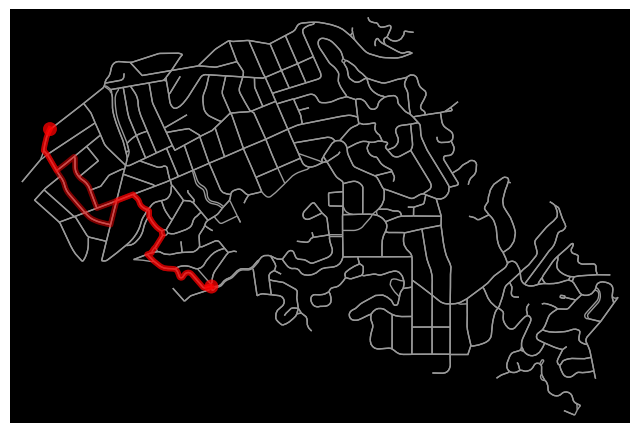

In [116]:
# pick route colors
c1 = 'r' #length
c2 = 'b' #travel_time
rc1 = [c1] * (len(route1) - 1)
rc2 = [c2] * (len(route2) - 1)
rc = rc1 + rc2
nc = [c1, c1, c2, c2]

# plot the routes
fig, ax = ox.plot_graph_routes(G, [route1, route2], route_color=rc, route_linewidth=6,node_size=0, bgcolor='k')

ax.legend()